In [33]:
from gensim.models.doc2vec import Doc2Vec
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

# Hierachical Clustering 로 변환
데이터 군집화 방법 중 하나로 계층적으로 군집화를 시키는 방법이다.
가까운 데이터끼리 묶기 좋은 방법으로 vector화 시켰을 때 거리가 가까운 데이터끼리 묶인 후 2차로 분류 해볼까 하여 시도해보았다.

In [3]:
model_name = 'dynamic_analysis\\Doc2vec_model_vector30_window15_dm0'
model = Doc2Vec.load(model_name) #저장된 모델 부르기

In [10]:
X = [vector for vector in model.docvecs.vectors_docs]

In [9]:
X[0]

array([-0.04750879,  0.54937816,  0.29126343, -0.72962934,  0.18855713,
       -0.52289975, -0.12340409,  0.23926736,  0.4020555 ,  0.47356707,
        0.33104348, -0.3402184 , -0.45358893,  0.5310426 , -0.11155209,
        0.4275416 , -0.6089715 ,  0.02444598,  0.3610221 ,  0.45330715,
       -0.72498715,  0.30071104,  0.09945086,  0.7093886 , -0.44906402,
        0.00444833, -0.28793186, -0.51262945, -0.21599379, -0.28049853,
       -0.2842514 , -0.1621473 , -1.0494134 ,  0.5359415 ,  0.47055924,
        0.18632779, -0.1671913 , -0.3725343 , -0.05615758,  0.29625002,
       -0.26285332,  0.07171399,  0.33930263,  0.23046392, -0.14256321,
       -0.23136593,  0.17002025,  0.44687736,  0.01924895, -0.23204952],
      dtype=float32)

linkage 옵션
    1. ward
        - 모든 클러스터 내의 분산을 가장 작게 증가시키는 두 클러스터를 합침. 크기가 비슷한 클러스터가 생성됨
    2. average
        - 클러스터 포인트 사이의 평균 거리가 가장 짧은 두 클러스터를 합침.
    3. complete
        - 최대연결 이라고도 함/ 클러스터 포인트사이의 최대거리가 가장 짧은 두 클러스터를 만듬.
    4. single
        - 최단연결

In [13]:
Z = linkage(X, 'ward')

# 1. cluster 2차원 시각화
vector로 거리를 측정 한뒤 tsne를 사용하여 2차원으로 시각화 하였다.

In [44]:
clusters = fcluster(Z, 40, criterion='distance') #clusters 로 생성

In [45]:
clusters.max()

12

In [46]:
clusters#각각 

array([2, 6, 8, ..., 8, 4, 5], dtype=int32)

In [ ]:
tsne = TSNE(n_components=2).fit(X)#빠른 계산과 시각화를 위해서 2차원으로 변환시킴
datapoint = tsne.fit_transform(X)

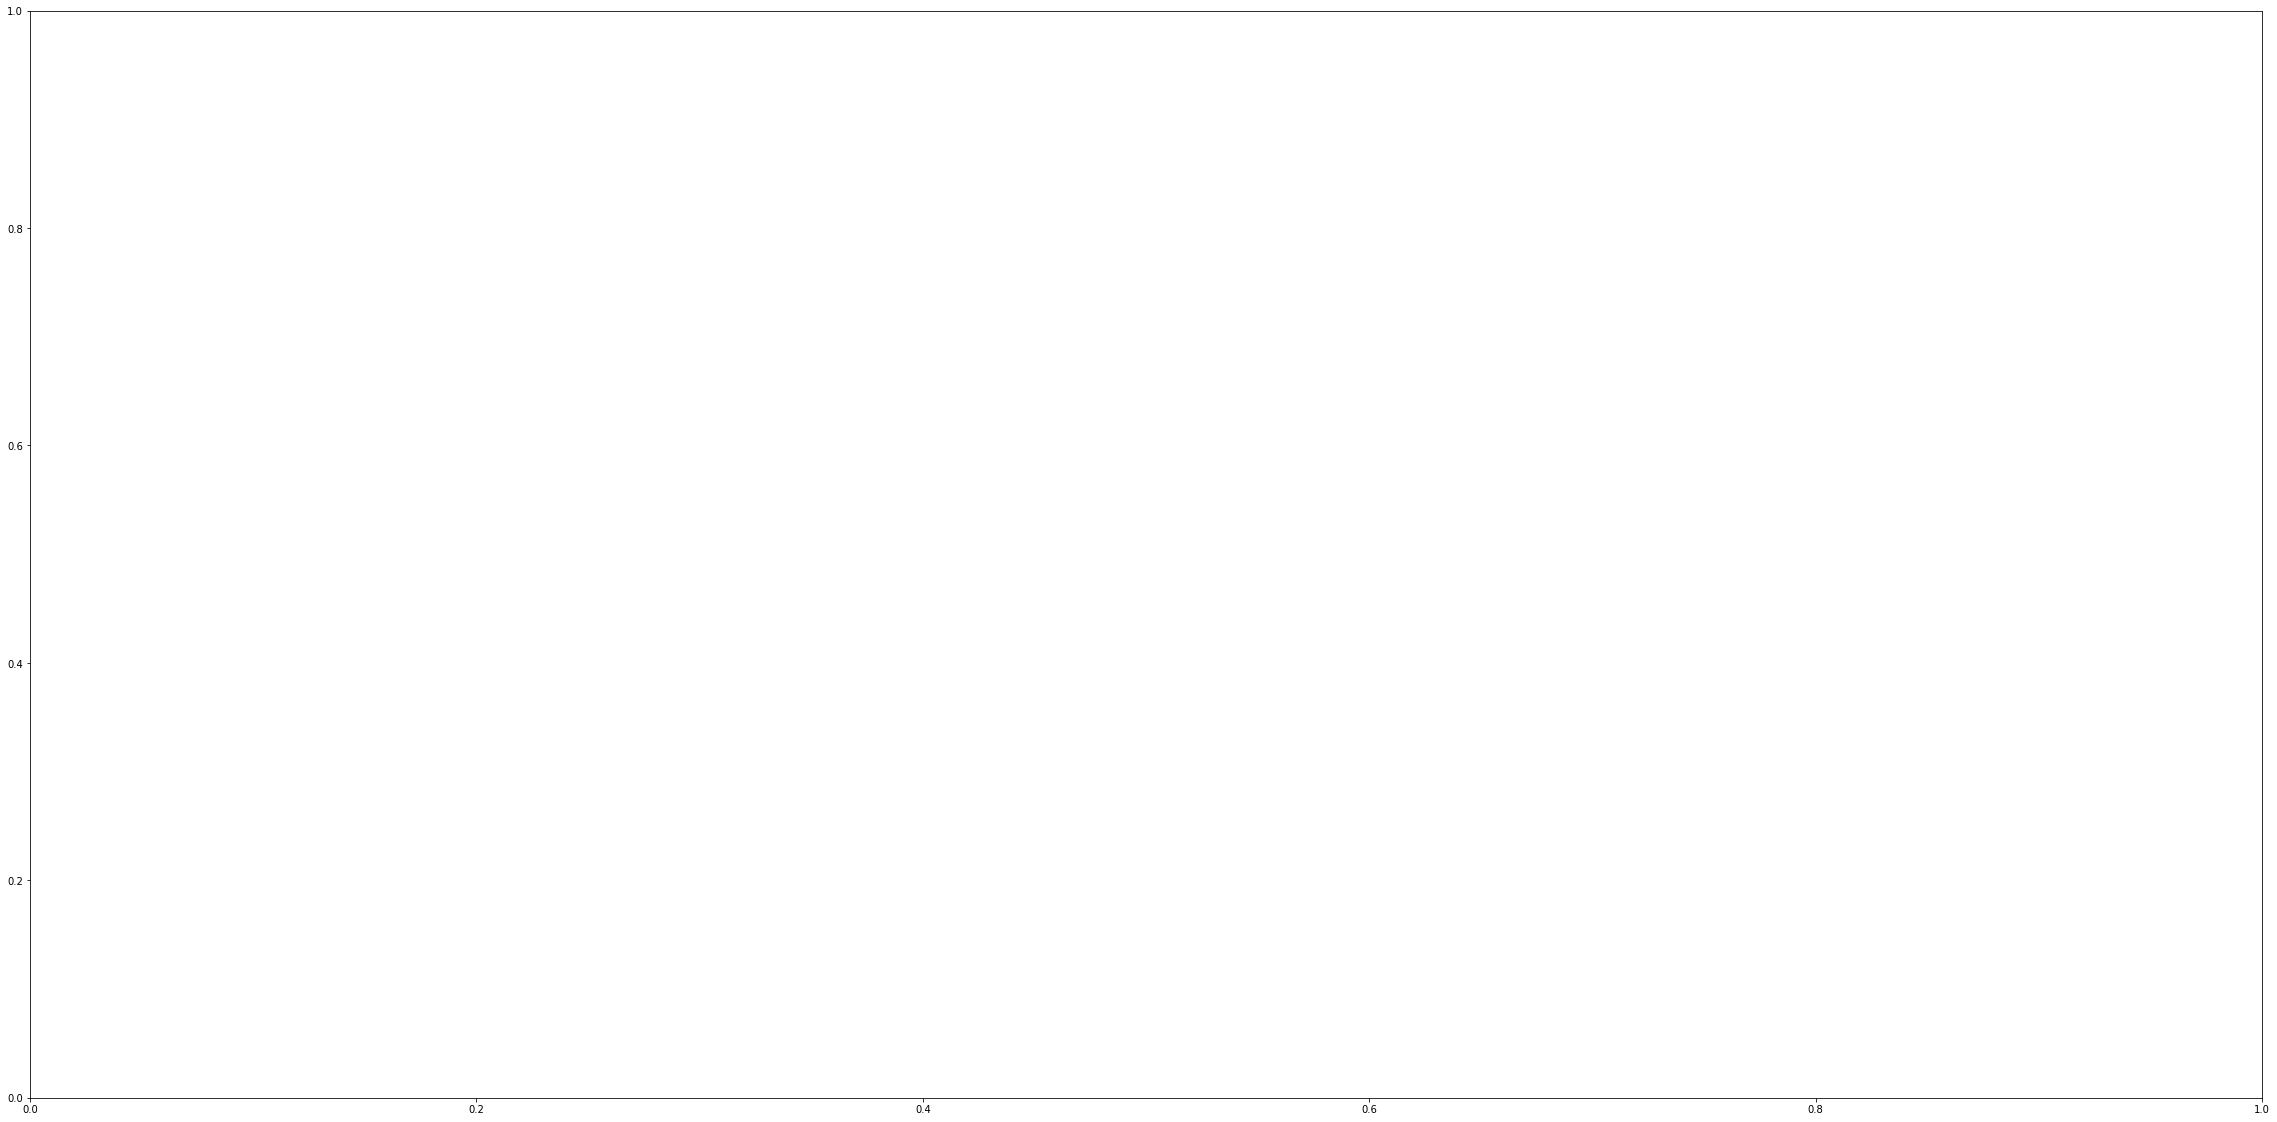

In [47]:
fig = plt.figure(figsize=(40, 20))
ax = fig.add_subplot(1, 1, 1)#그림 생성

In [48]:
ax.scatter(datapoint[:,0], datapoint[:,1], c=clusters, cmap='prism')#위치 그리기

In [49]:
fig.savefig('Hierachical_Clustering_clusters.png')

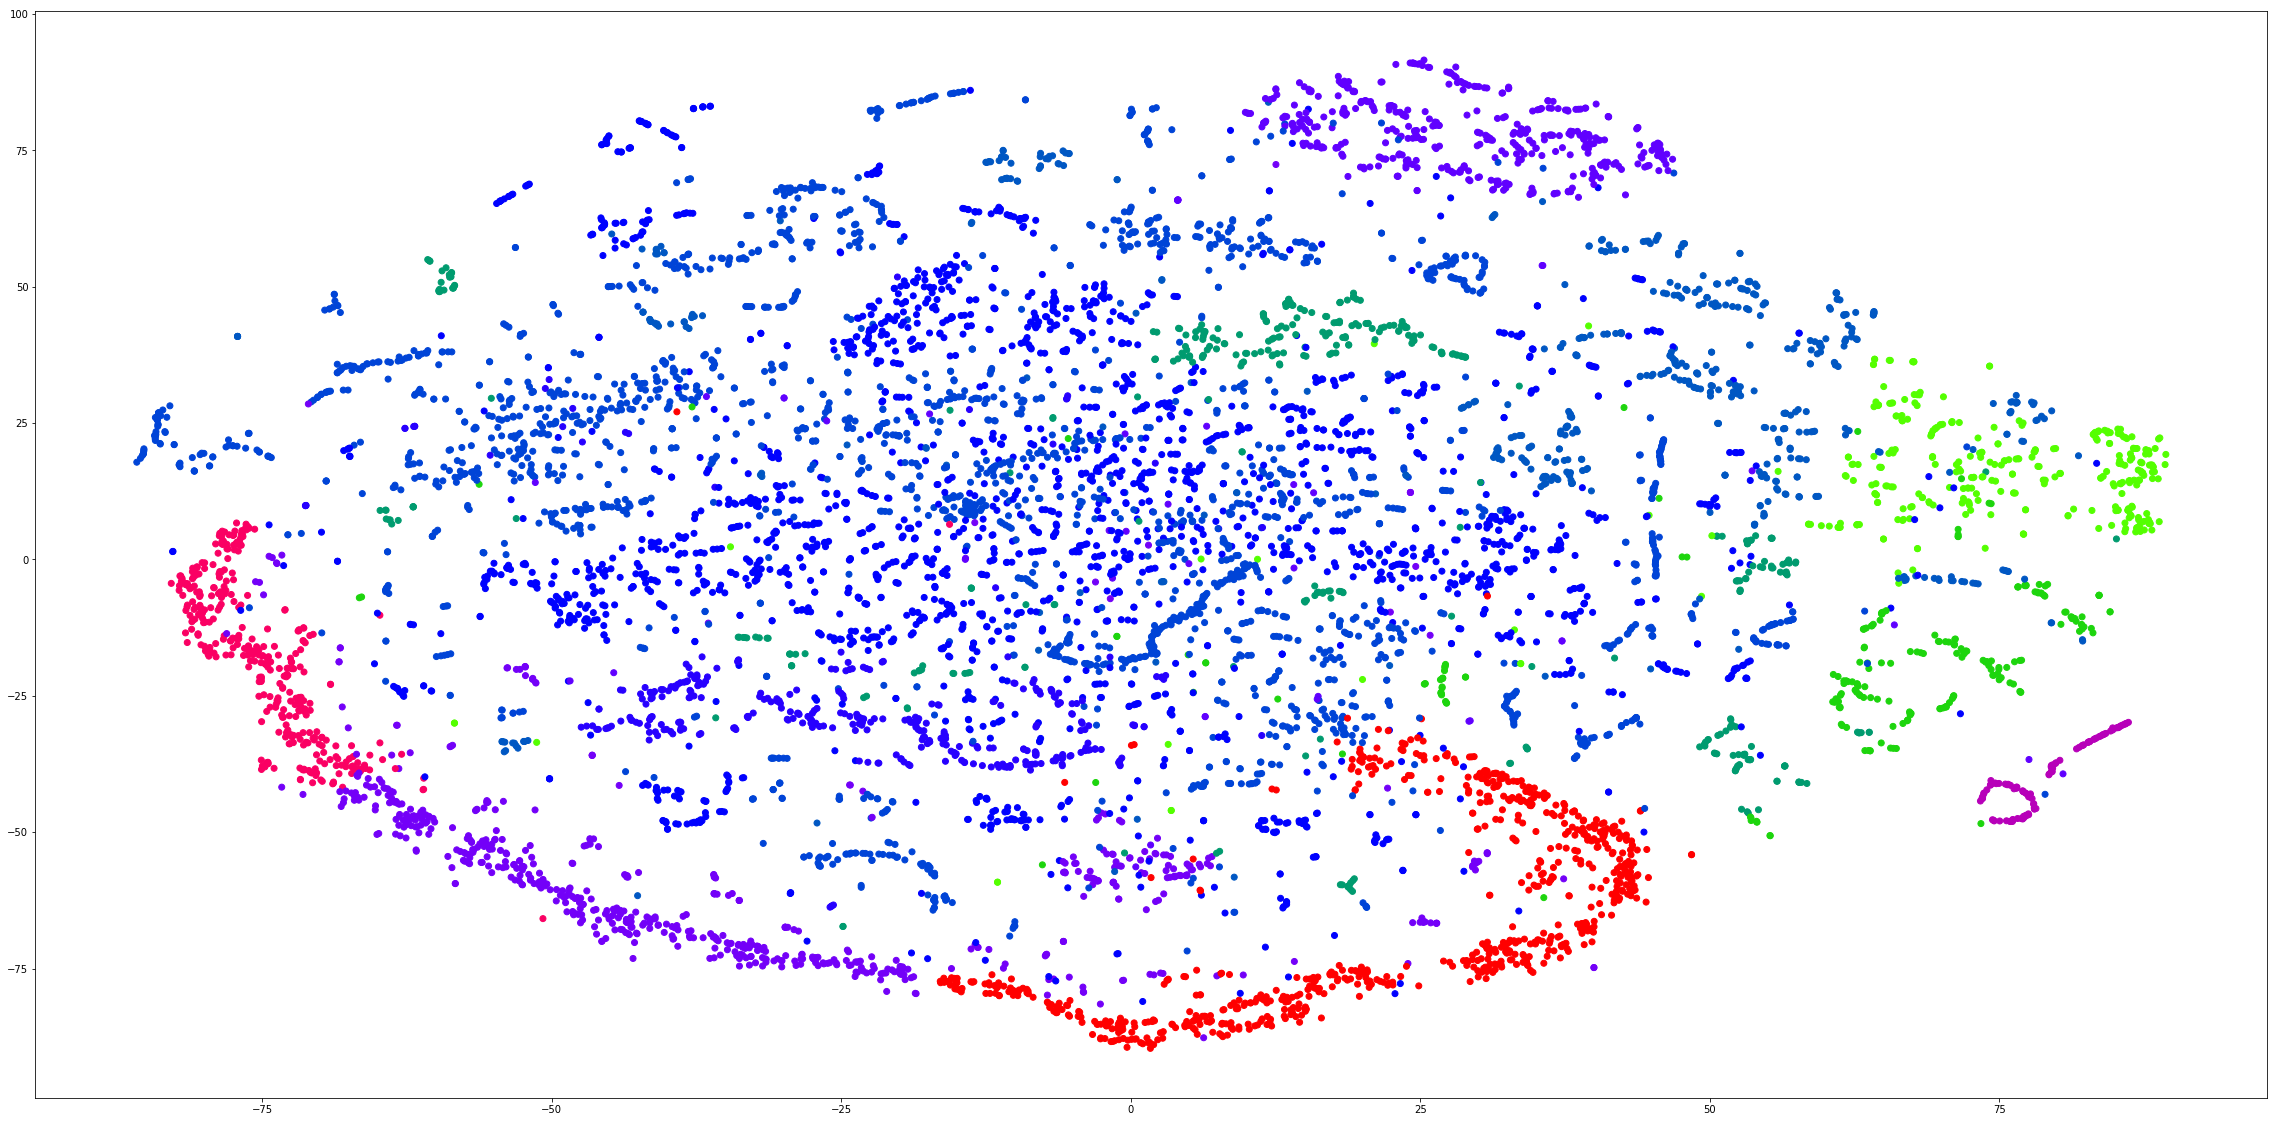

In [50]:
fig

#  2. 트리 구조로 시각화
dendrogram 을 사용하여 트리구조로 시각화 하였다. 여러 옵션이 있지만 아직 사용해 보지 못하였다.

In [ ]:
#tree 구조로 생성
fig = plt.figure(figsize=(900, 50))
ax = fig.add_subplot(111)

In [51]:
dendrogram(
    Z,
    leaf_rotation=90,  # rotates the x axis labels
    leaf_font_size=3,  # font size for the x axis labels
    ax=ax,
    #orientation='right'#방향
    )

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [12.5, 12.5, 42.5, 42.5],
  [65.0, 65.0, 75.0, 75.0],
  [85.0, 85.0, 95.0, 95.0],
  [70.0, 70.0, 90.0, 90.0],
  [115.0, 115.0, 125.0, 125.0],
  [135.0, 135.0, 145.0, 145.0],
  [120.0, 120.0, 140.0, 140.0],
  [105.0, 105.0, 130.0, 130.0],
  [155.0, 155.0, 165.0, 165.0],
  [117.5, 117.5, 160.0, 160.0],
  [80.0, 80.0, 138.75, 138.75],
  [27.5, 27.5, 109.375, 109.375],
  [175.0, 175.0, 185.0, 185.0],
  [195.0, 195.0, 205.0, 205.0],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [200.0, 200.0, 222.5, 222.5],
  [180.0, 180.0, 211.25, 211.25],
  [245.0, 245.0, 255.0, 255.0],
  [265.0, 265.0, 275.0, 275.0],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [270.0, 270.0, 292.5, 292.5],
  [250.0, 250.0, 281.25, 281.25],
  [195.625, 195.625, 265.625, 265.625],
  [325.0, 325.0, 335.0, 335.0],
  [315.0, 315.0, 330.0, 330.0],
  [345.0, 345.0, 3

In [52]:
fig.savefig('Hierachical_Clustering_tree.png')

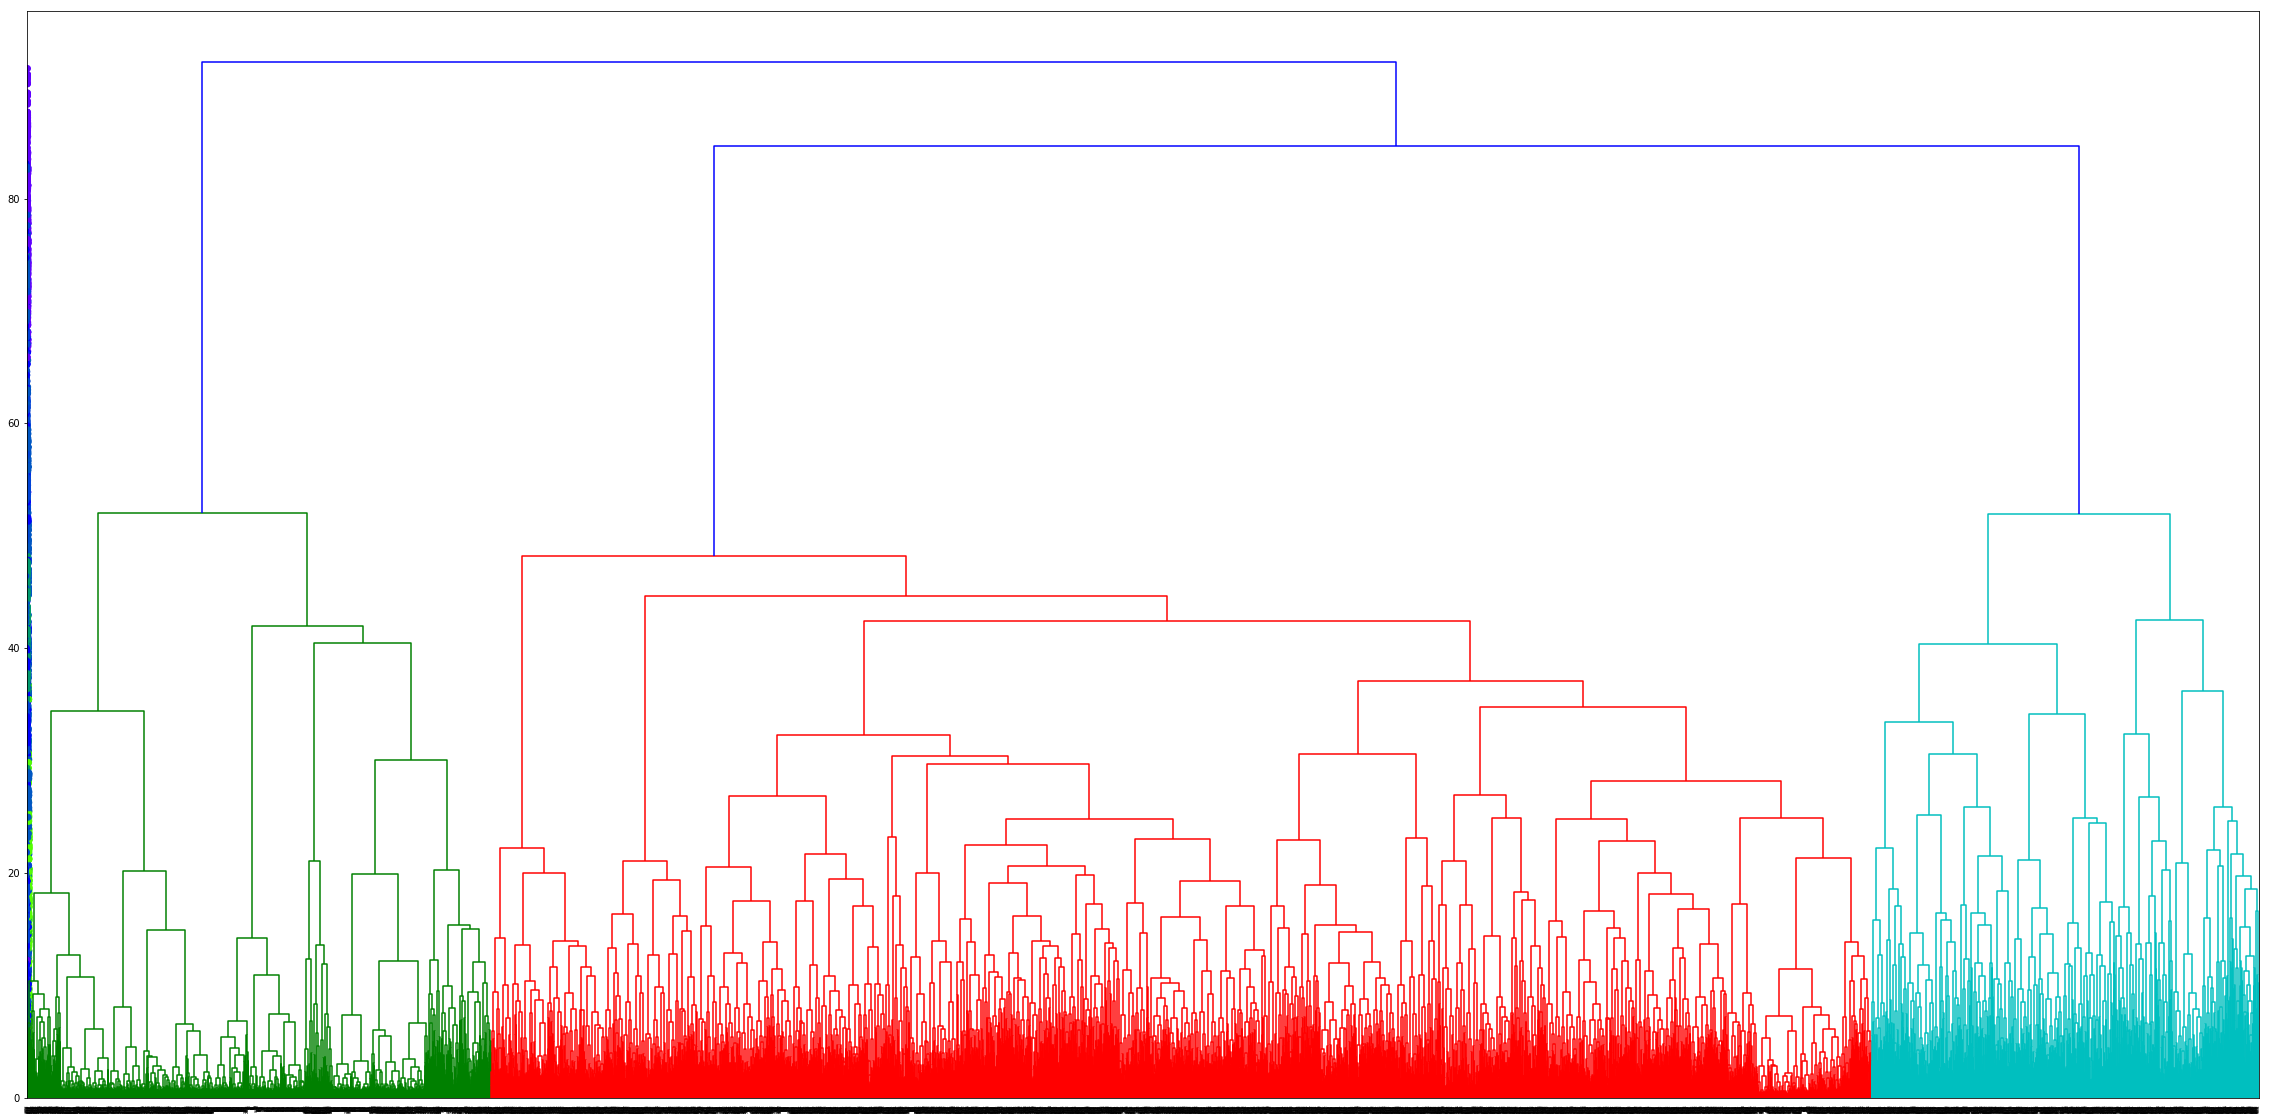

In [53]:
fig